<a href="https://colab.research.google.com/github/suryatejabatchu08/Employee-Attrition-Prediction/blob/main/Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EMPLOYEE ATTRITION PREDICTION**

# SECTION 1 — Introduction


EMPLOYEE ATTRITION PREDICTION — IBM HR ANALYTICS DATASET

Problem Statement:

Employee attrition — employees leaving an organization — is a major challenge
for HR departments because it increases recruitment costs, training costs,
knowledge loss, and productivity drops. Understanding which employees are
likely to leave helps HR take preventive actions such as workload reduction,
salary adjustments, better engagement programs, or career development support.

Goal of this project:
Build a Machine Learning model that predicts whether an employee will leave
the company (Attrition: Yes/No) based on features such as job satisfaction,
monthly income, work-life balance, overtime, age, tenure, etc.

Target Variable:
Attrition (Yes = 1, No = 0)

Expected Outcome:
A predictive system that identifies high-risk employees and provides
interpretability (feature importance + SHAP) to understand WHY employees leave,
supporting smarter HR decisions and reducing turnover.




This notebook aims to build a Machine Learning model to predict employee attrition based on various features. We will go through data loading, exploration, preprocessing, model training, evaluation, and finally, deploy a simple Streamlit application.

# SECTION 2 — Import Libraries

Here, we import all necessary libraries for data manipulation, visualization, machine learning modeling, and model evaluation. This includes pandas, numpy, matplotlib, seaborn, scikit-learn components and joblib for model saving.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve,
    precision_recall_curve
)

import shap
import joblib
import warnings
warnings.filterwarnings("ignore")

RANDOM_SEED = 42

# For cleaner visuals
plt.style.use("seaborn-v0_8")

In [ ]:
!pip install streamlit pyngrok --quiet


In [ ]:
from pyngrok import ngrok

ngrok.set_auth_token("34WRyOLesmQjcKNj8oKknmG8xDZ_6tGGeK9N76wQPTK4iezyT")

print("Ngrok authentication added successfully!")


Ngrok authentication added successfully!


# SECTION 3 — Load Dataset


This step involves loading the IBM HR Analytics dataset from a specified URL into a pandas DataFrame, which is the foundation for our analysis.

In [ ]:
data_path = "https://raw.githubusercontent.com/suryatejabatchu08/Employee-Attrition-Prediction/refs/heads/main/WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(data_path)
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [ ]:
# Show basic information
print("\nDataset Shape:", df.shape)
df.head()


Dataset Shape: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# SECTION 4 — Basic Data Understanding

In this section, we perform initial data exploration steps. We will preview the first few rows, check data types and non-null counts, and get a statistical summary of numerical features to understand the dataset's structure and content.

In [ ]:
# Preview first few rows
print(" First 5 rows of the dataset:")
display(df.head())

 First 5 rows of the dataset:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Dataset info (columns, types, nulls)
print("\n Dataset Info:")
df.info()


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel

In [ ]:
# Statistical summary of numerical features
print("\n Statistical Summary:")
display(df.describe().T)


 Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
# Check missing values
print("\n Missing Values:")
display(df.isnull().sum())


 Missing Values:


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


# SECTION 5 — Target Variable Setup

Here, we prepare our target variable, 'Attrition'. This involves checking unique values, converting 'Yes'/'No' labels to numerical (1/0) for modeling, and examining the distribution of the target variable to understand class imbalance.

In [ ]:
# Check unique values in Attrition
print("Unique values in Attrition column:")
print(df["Attrition"].unique())

# Convert Yes/No → 1/0
df["Attrition_flag"] = df["Attrition"].map({"Yes": 1, "No": 0})

print("\n Distribution of Attrition (0 = Stay, 1 = Leave):")
display(df["Attrition_flag"].value_counts())

print("\n Percentage Distribution:")
display(df["Attrition_flag"].value_counts(normalize=True) * 100)

Unique values in Attrition column:
['Yes' 'No']

 Distribution of Attrition (0 = Stay, 1 = Leave):


,count
Attrition_flag,
0,1233
1,237



 Percentage Distribution:


,proportion
Attrition_flag,
0,83.877551
1,16.122449


# SECTION 6A — Missing Values Overview

This section provides an overview of missing values in the dataset. We'll count and display any missing values and visualize them using a heatmap to quickly identify columns with incomplete data.

Missing values count:


,0


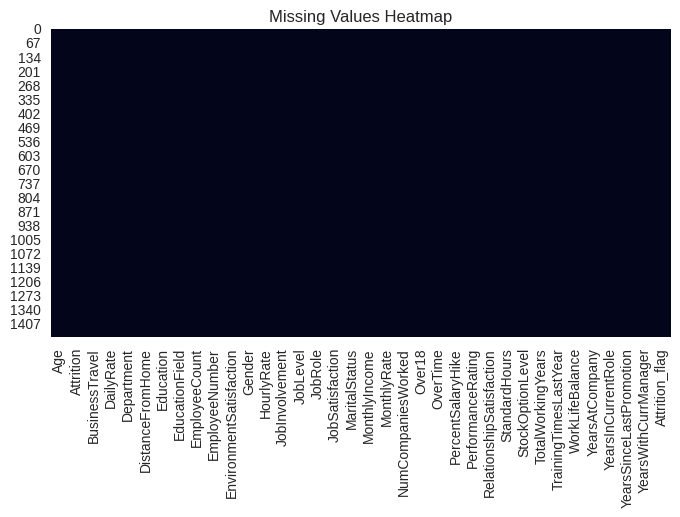

In [ ]:
print("Missing values count:")
missing = df.isnull().sum()
display(missing[missing > 0])

plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# SECTION 6B — Numerical Distributions

Here, we visualize the distributions of numerical features using histograms. This helps us understand the spread, central tendency, and shape of the data for each numerical column.

Total numerical columns: 26


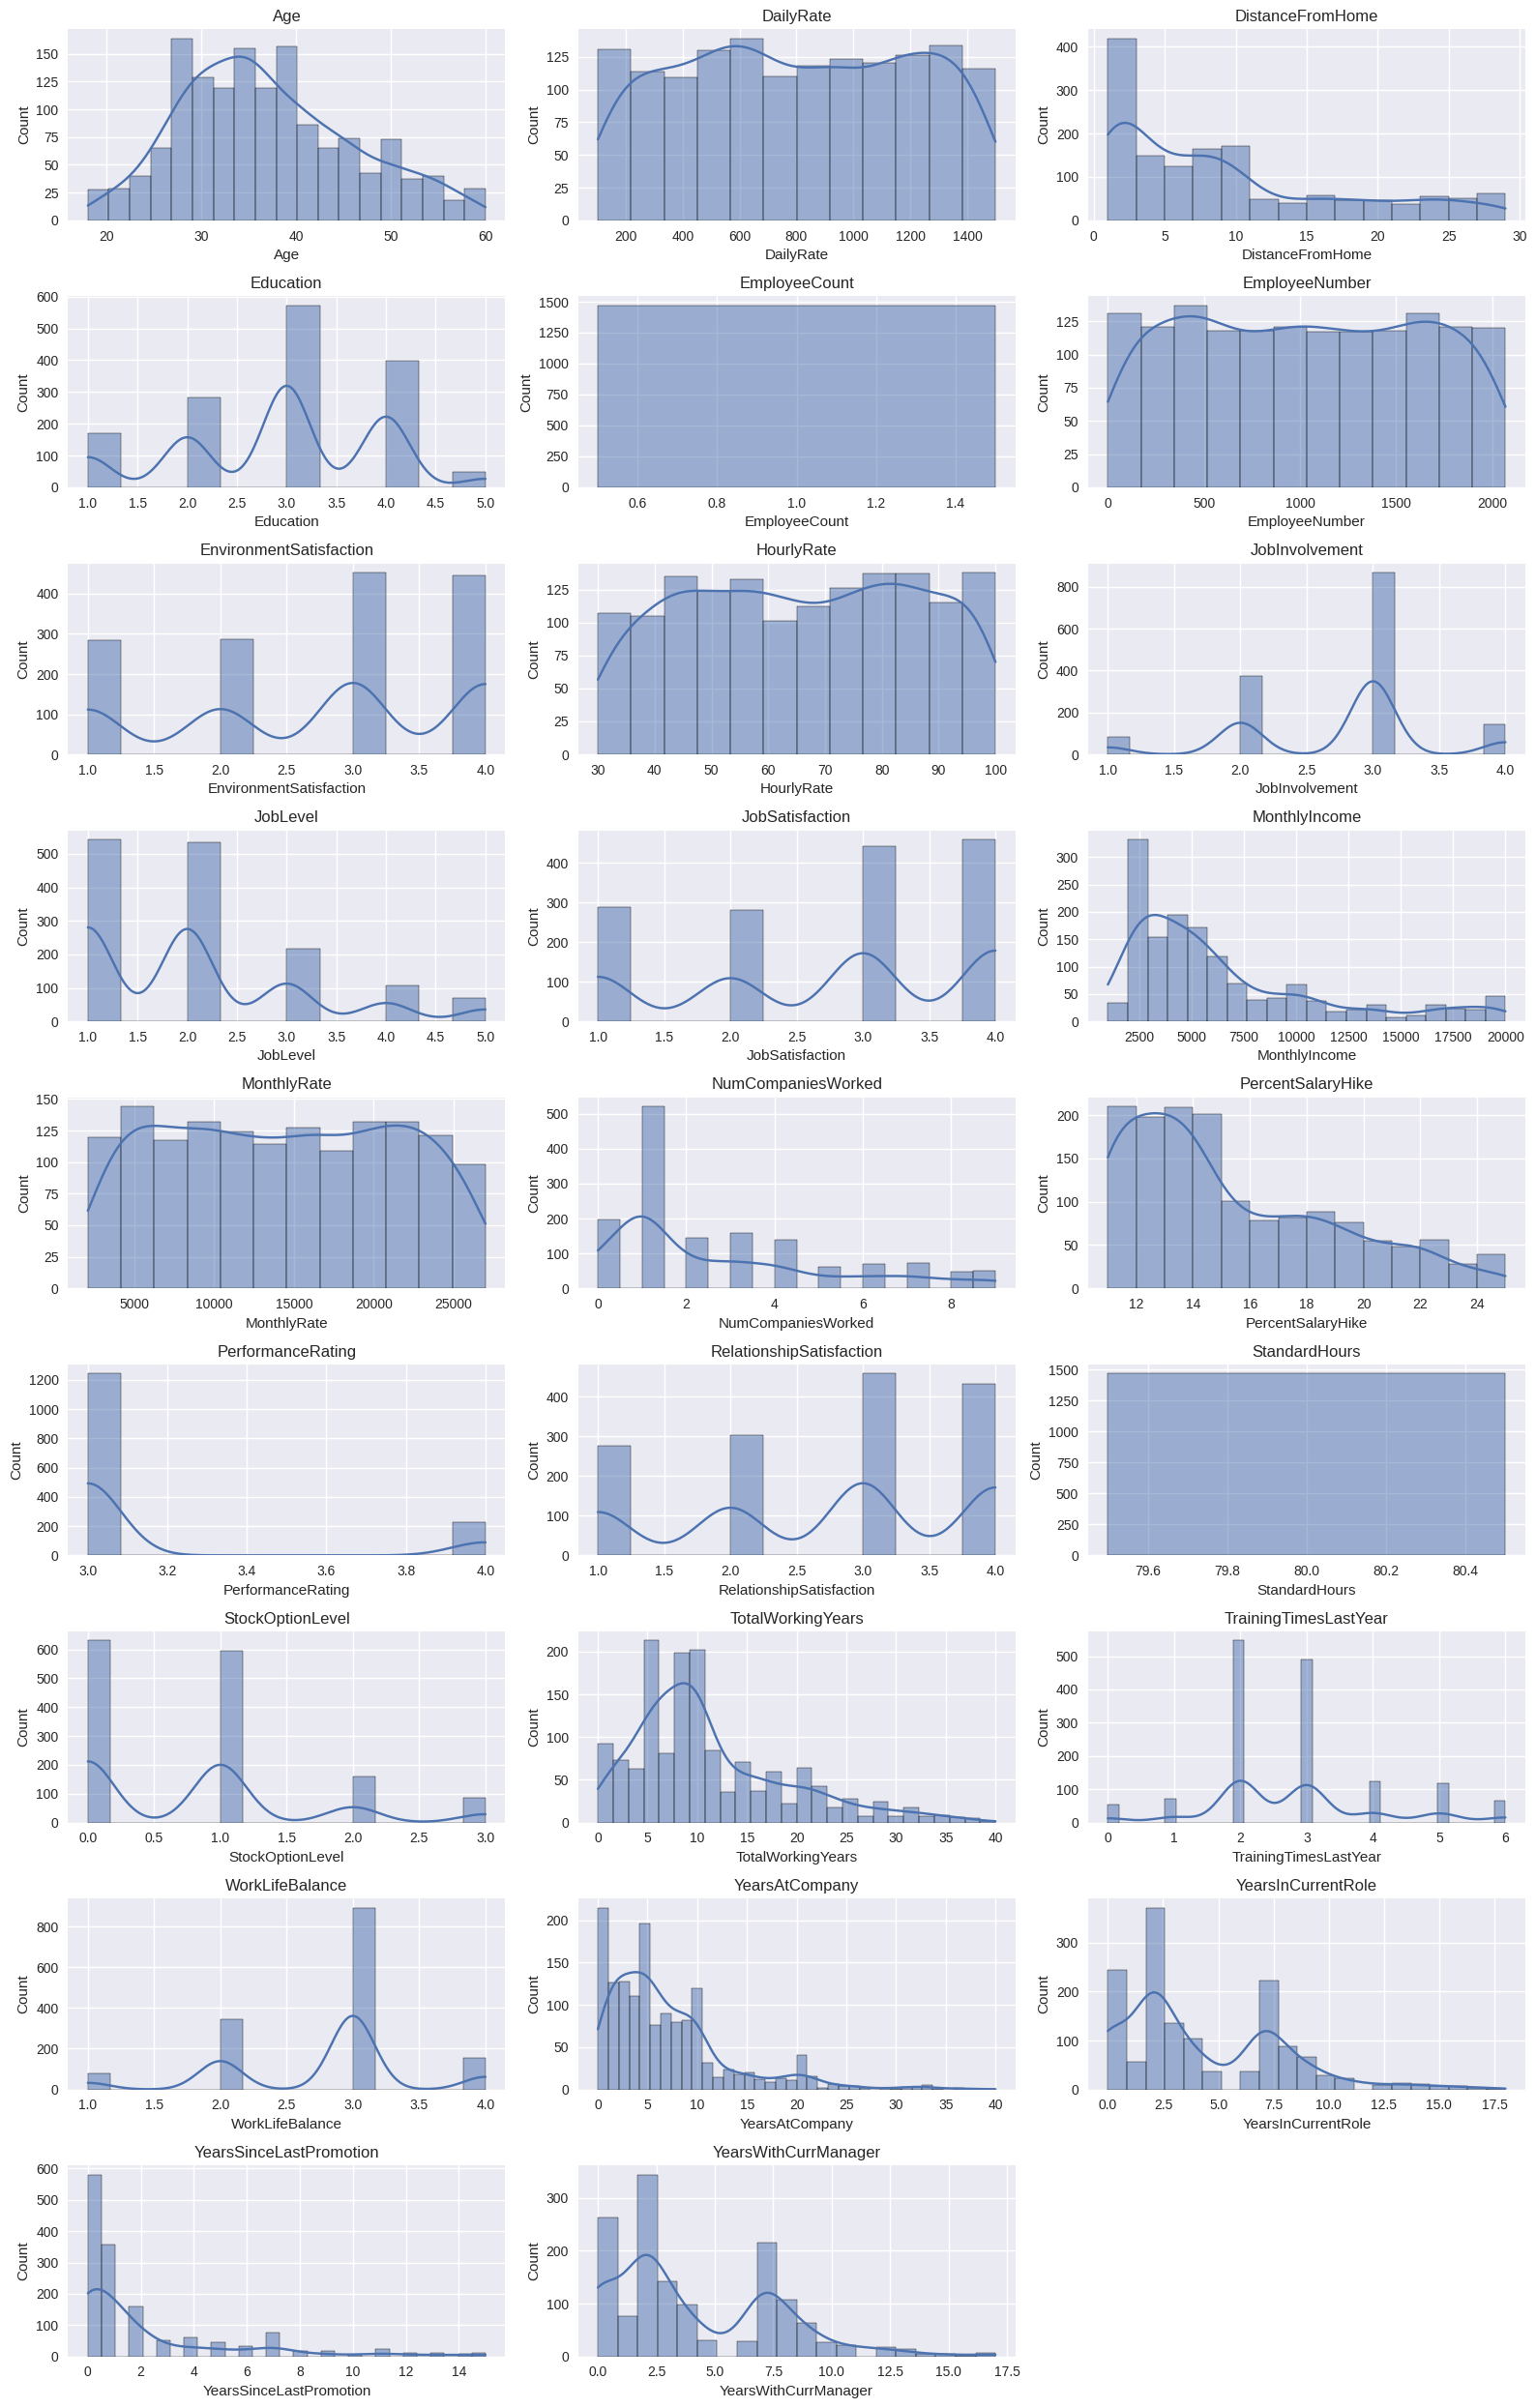

In [ ]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols = [c for c in num_cols if c not in ["Attrition_flag"]]  # exclude target

print(f"Total numerical columns: {len(num_cols)}")

plt.figure(figsize=(16, 25))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols)//3)+1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# SECTION 6C — Boxplots for Outliers

We use boxplots to identify outliers and understand the distribution of several important numerical features. This visualization helps in detecting anomalies that might affect model performance.

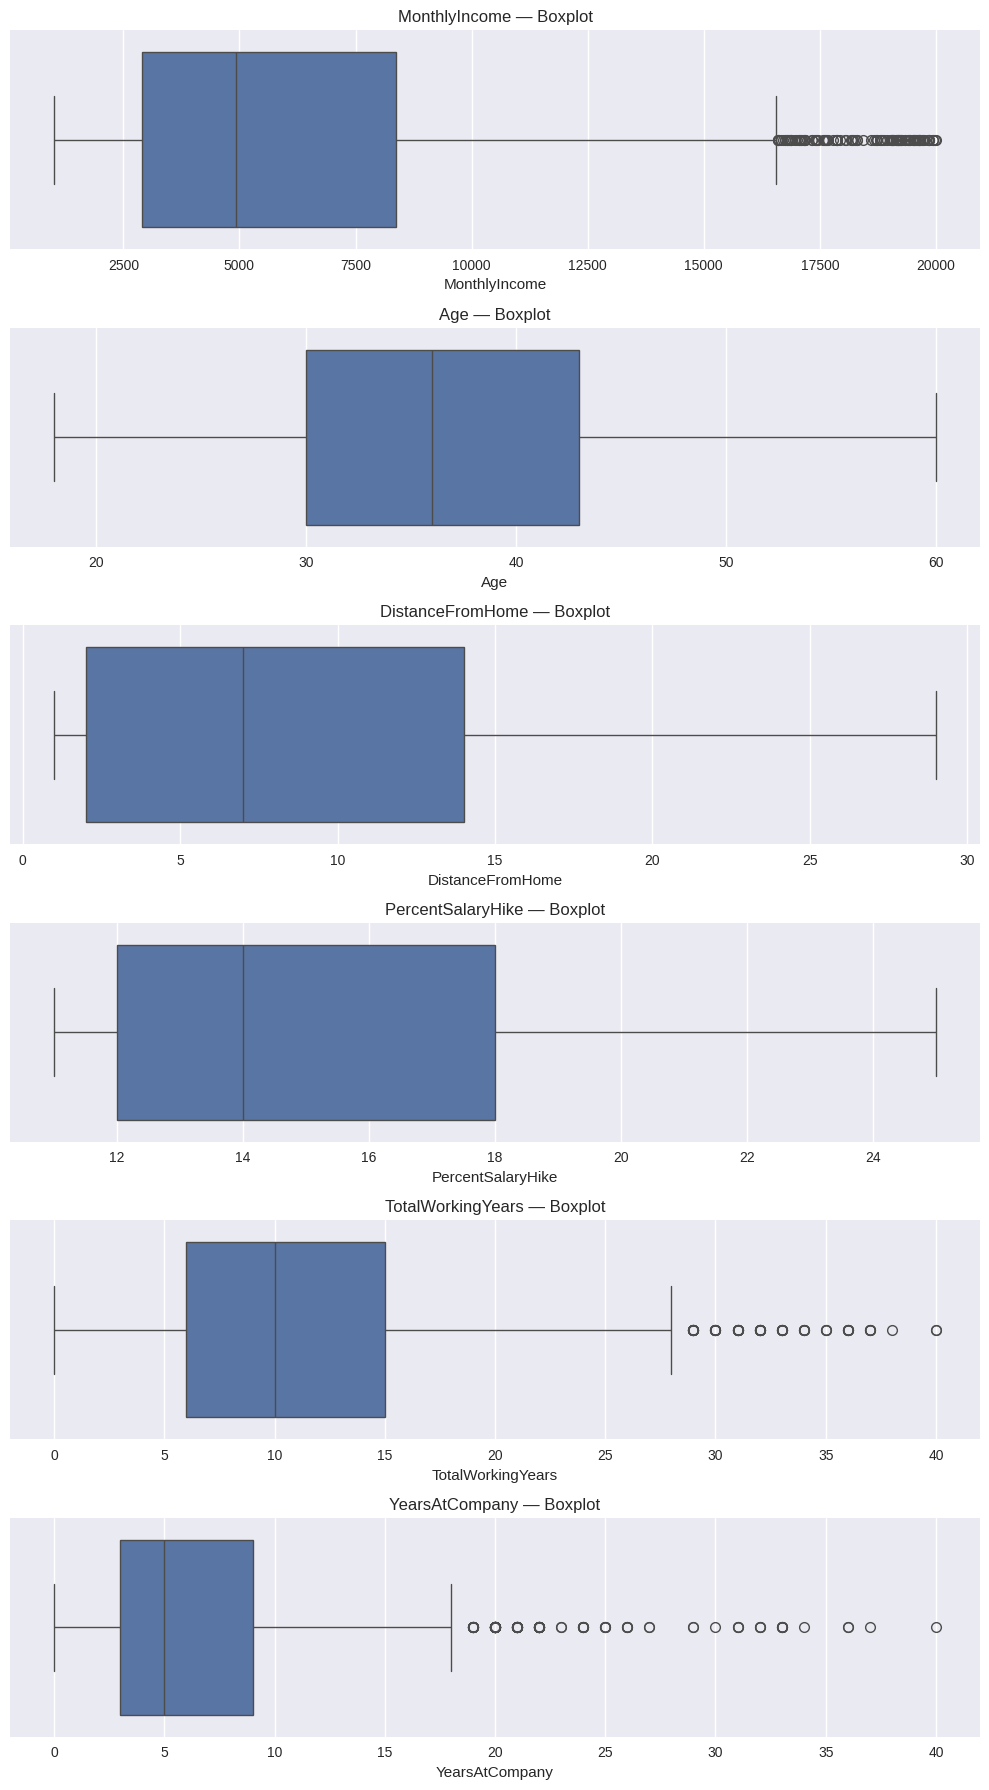

In [ ]:
important_num = ["MonthlyIncome", "Age", "DistanceFromHome",
                 "PercentSalaryHike", "TotalWorkingYears", "YearsAtCompany"]

plt.figure(figsize=(10, 18))
for i, col in enumerate(important_num, 1):
    if col in df.columns:
        plt.subplot(6, 1, i)
        sns.boxplot(x=df[col])
        plt.title(f"{col} — Boxplot")
plt.tight_layout()
plt.show()

# SECTION 6D — Categorical Distribution vs Attrition


This section explores the relationship between categorical features and the attrition rate. Bar plots are used to visualize how attrition varies across different categories of each feature, highlighting potential drivers of attrition.

Total categorical columns: 8


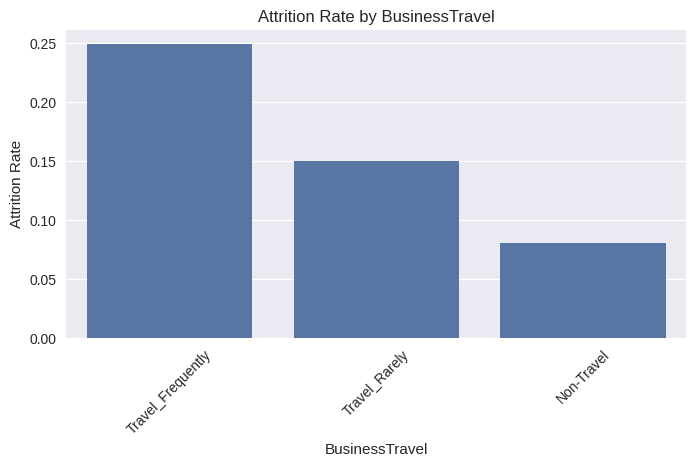

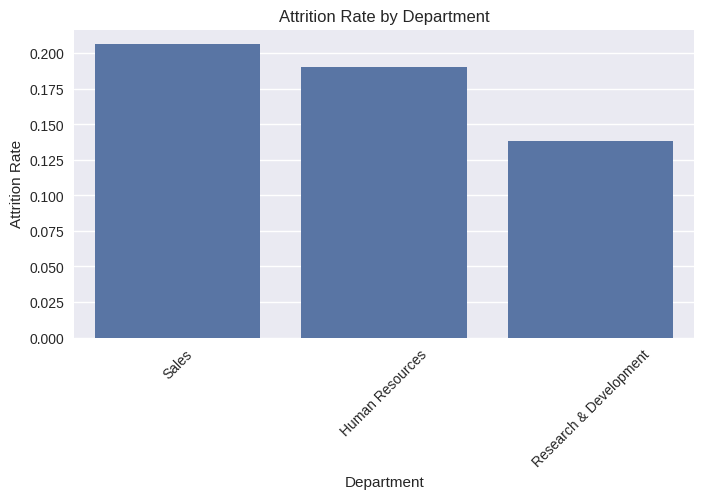

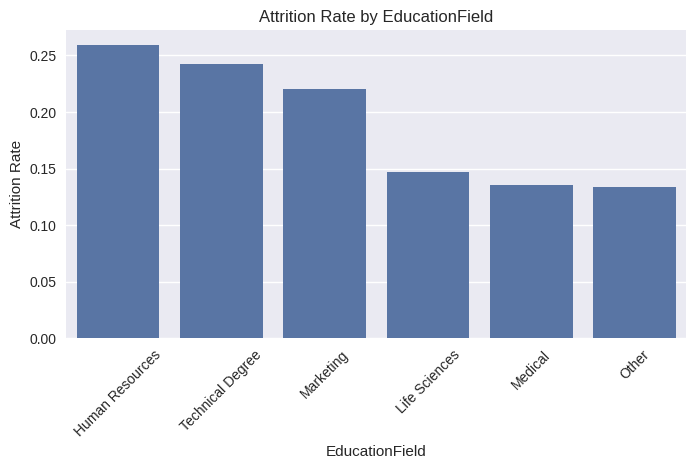

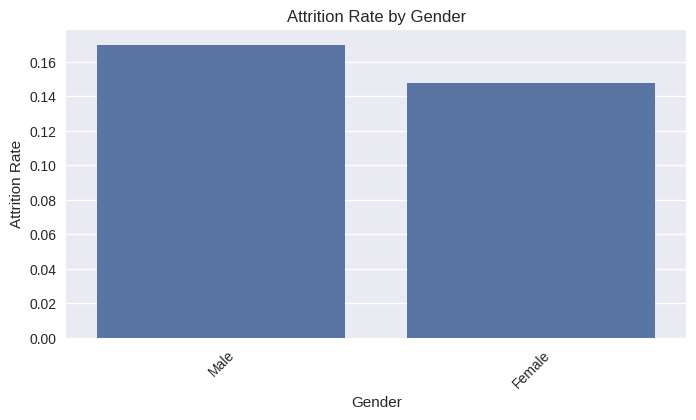

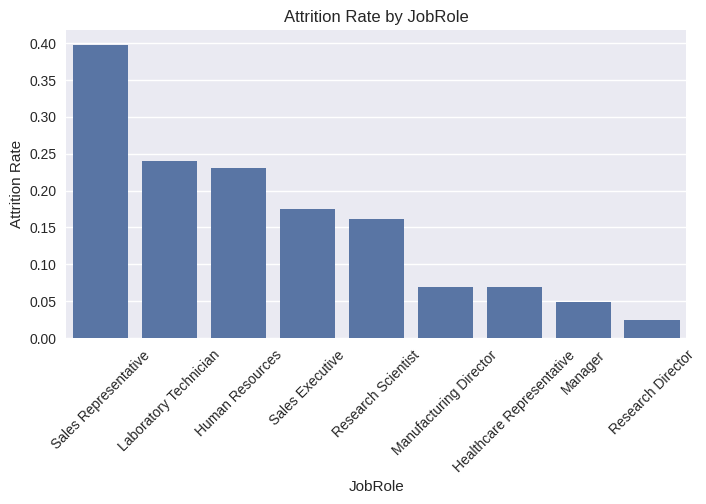

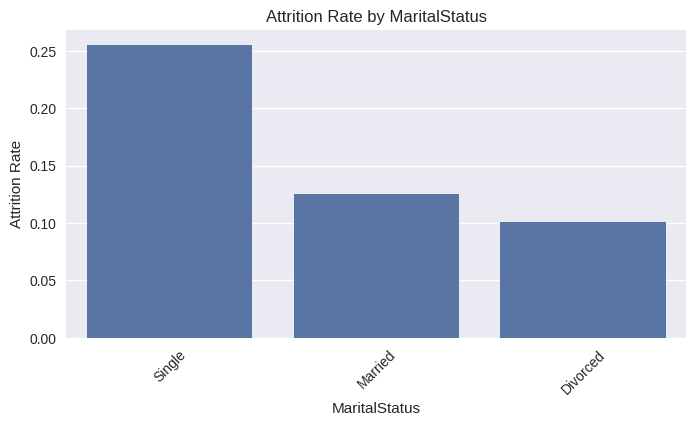

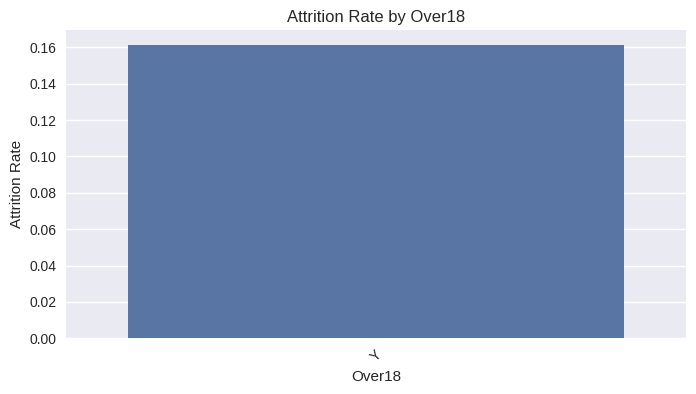

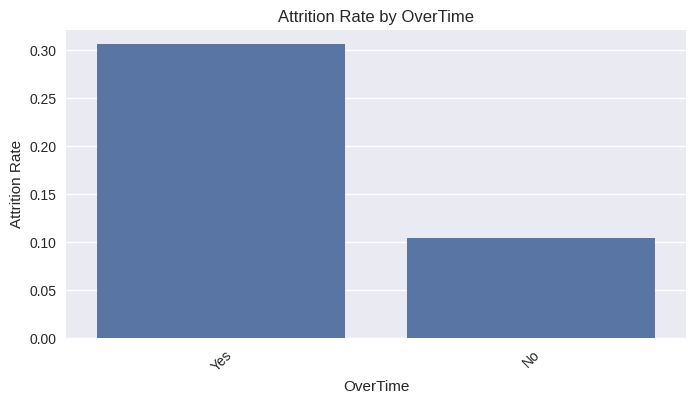

In [ ]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
cat_cols = [c for c in cat_cols if c not in ["Attrition"]]

print(f"Total categorical columns: {len(cat_cols)}")

for col in cat_cols:
    plt.figure(figsize=(8,4))
    attr = df.groupby(col)["Attrition_flag"].mean().sort_values(ascending=False)
    sns.barplot(x=attr.index, y=attr.values)
    plt.title(f"Attrition Rate by {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Attrition Rate")
    plt.show()

# SECTION 6E — Correlation Heatmap

A correlation heatmap is generated for numerical features to visualize the linear relationships between them. This helps in identifying highly correlated features and understanding their interdependencies.

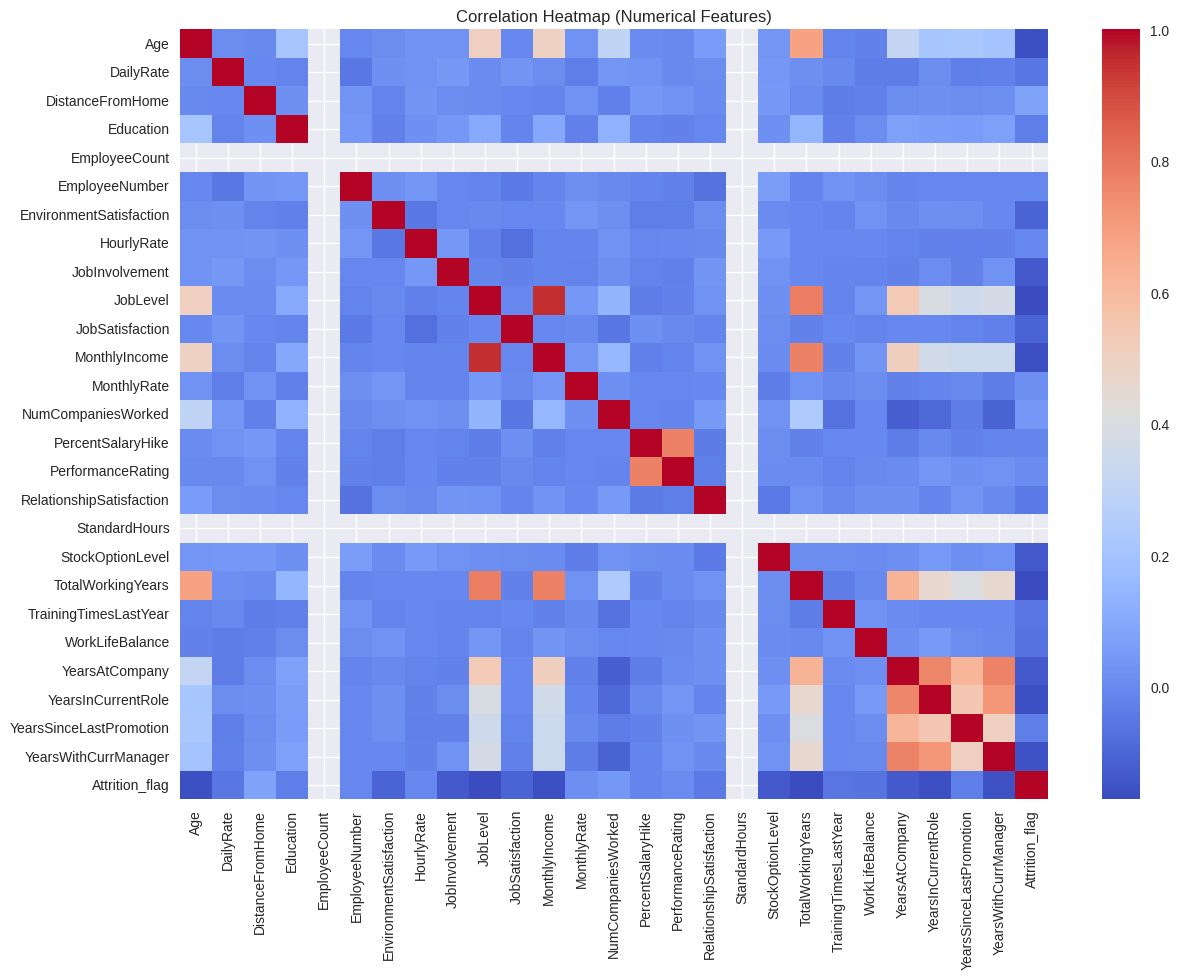

In [ ]:
plt.figure(figsize=(14,10))
num_cols_corr = df.select_dtypes(include=["int64","float64"]).columns
sns.heatmap(df[num_cols_corr].corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

# SECTION 7A — Drop Unnecessary Columns & Define Feature Groups

In this step, we identify and drop columns that are non-informative or redundant for our predictive model. We also separate the remaining features into numerical and categorical groups for subsequent preprocessing.

In [ ]:
# Columns known to be non-informative
drop_cols = ["EmployeeCount", "EmployeeNumber", "StandardHours", "Over18"]

existing_drop_cols = [c for c in drop_cols if c in df.columns]

print("Dropping columns:", existing_drop_cols)

df_model = df.drop(columns=existing_drop_cols)

# Identify numerical and categorical columns
num_features = df_model.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_features = [c for c in num_features if c not in ["Attrition_flag"]]   # exclude target

cat_features = df_model.select_dtypes(include=["object"]).columns.tolist()
cat_features = [c for c in cat_features if c not in ["Attrition"]]       # exclude original label column

print("\nNumerical Features Count:", len(num_features))
print("Categorical Features Count:", len(cat_features))

Dropping columns: ['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18']

Numerical Features Count: 23
Categorical Features Count: 7


# SECTION 7B — Feature Engineering

This section involves creating new features from existing ones to potentially improve model performance. Specifically, we're creating 'Tenure_Group' based on 'TotalWorkingYears' and 'Income_Bucket' based on 'MonthlyIncome'.

In [ ]:
# Tenure groups (TotalWorkingYears required)
if "TotalWorkingYears" in df_model.columns:
    df_model["Tenure_Group"] = pd.cut(
        df_model["TotalWorkingYears"].fillna(0),
        bins=[-1, 2, 5, 10, 20, 60],
        labels=["0-2", "3-5", "6-10", "11-20", "20+"]
    )
    cat_features.append("Tenure_Group")

# Income quartile buckets
if "MonthlyIncome" in df_model.columns:
    df_model["Income_Bucket"] = pd.qcut(
        df_model["MonthlyIncome"],
        q=4,
        labels=["Low", "Mid", "High", "Very_High"]
    )
    cat_features.append("Income_Bucket")

print("Feature engineering complete!")

Feature engineering complete!


# SECTION 8 — Preprocessing Pipelines

We define preprocessing pipelines for numerical and categorical features. Numerical features will be imputed (median) and scaled (StandardScaler), while categorical features will be imputed (most frequent) and one-hot encoded. These are combined into a single ColumnTransformer.

In [ ]:
# Numerical transformer: impute missing values + scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical transformer: impute + one-hot encode
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Full preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ],
    remainder="drop"
)

print("Preprocessing pipeline created successfully!")


Preprocessing pipeline created successfully!


# SECTION 9 — Train/Test Split


The dataset is split into training and testing sets. We use `stratify=y` to ensure that both sets have a similar distribution of the target variable ('Attrition_flag'), which is crucial for imbalanced datasets.

In [ ]:
# Define X (features) and y (target)
X = df_model.drop(columns=["Attrition", "Attrition_flag"])
y = df_model["Attrition_flag"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_SEED,
    stratify=y   # ensures same distribution of attrition
)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)
print("\nStratification Check:")
print("Train Attrition %:", y_train.mean())
print("Test Attrition %:", y_test.mean())


Train Shape: (1176, 32)
Test Shape: (294, 32)

Stratification Check:
Train Attrition %: 0.16156462585034015
Test Attrition %: 0.1598639455782313


# SECTION 10 — Baseline Models

This section sets up baseline machine learning models using Logistic Regression and Random Forest. Pipelines are created to integrate the preprocessing steps with the classifiers, ensuring a streamlined workflow.

In [ ]:
# Logistic Regression Pipeline
pipe_lr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("clf", LogisticRegression(max_iter=1000, random_state=RANDOM_SEED))
])

# Random Forest Pipeline
pipe_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("clf", RandomForestClassifier(random_state=RANDOM_SEED))
])

The Logistic Regression and Random Forest models are trained on the preprocessed training data. After training, predictions and probability predictions are generated for the test set to evaluate their performance.

In [ ]:
print("Training Logistic Regression...")
pipe_lr.fit(X_train, y_train)

print("Training Random Forest...")
pipe_rf.fit(X_train, y_train)

# Predictions
y_pred_lr = pipe_lr.predict(X_test)
y_pred_rf = pipe_rf.predict(X_test)

# Probability predictions
try:
    y_prob_lr = pipe_lr.predict_proba(X_test)[:, 1]
except:
    y_prob_lr = None

try:
    y_prob_rf = pipe_rf.predict_proba(X_test)[:, 1]
except:
    y_prob_rf = None

Training Logistic Regression...
Training Random Forest...


This helper function is defined to standardize the evaluation of our machine learning models. It prints common metrics such as accuracy, precision, recall, F1-score, and ROC-AUC, along with a classification report.

In [ ]:
# -----------------------
# Helper function
# -----------------------
def evaluate_model(name, y_true, y_pred, y_prob=None):
    print(f"\n==============================")
    print(f"📌 {name} — Evaluation Metrics")
    print(f"==============================")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    if y_prob is not None:
        print("ROC-AUC:", roc_auc_score(y_true, y_prob))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

We evaluate the performance of the Logistic Regression model using the `evaluate_model` function. This provides a comprehensive overview of its predictive capabilities on the test data.

In [ ]:
# Evaluate
evaluate_model("Logistic Regression (Baseline)", y_test, y_pred_lr, y_prob_lr)


📌 Logistic Regression (Baseline) — Evaluation Metrics
Accuracy: 0.8673469387755102
Precision: 0.7
Recall: 0.2978723404255319
F1 Score: 0.417910447761194
ROC-AUC: 0.8199672667757775

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.70      0.30      0.42        47

    accuracy                           0.87       294
   macro avg       0.79      0.64      0.67       294
weighted avg       0.85      0.87      0.84       294



Similarly, the Random Forest baseline model is evaluated using the `evaluate_model` function to assess its initial performance on the test set before any hyperparameter tuning.

In [ ]:
# Evaluate
evaluate_model("Random Forest (Baseline)", y_test, y_pred_rf, y_prob_rf)


📌 Random Forest (Baseline) — Evaluation Metrics
Accuracy: 0.8435374149659864
Precision: 0.5454545454545454
Recall: 0.1276595744680851
F1 Score: 0.20689655172413793
ROC-AUC: 0.7726333017486433

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       247
           1       0.55      0.13      0.21        47

    accuracy                           0.84       294
   macro avg       0.70      0.55      0.56       294
weighted avg       0.81      0.84      0.80       294



# SECTION 11 — Confusion Matrix & Curves

This cell generates and displays a confusion matrix for the Random Forest model. The confusion matrix provides a detailed breakdown of correct and incorrect predictions for each class.

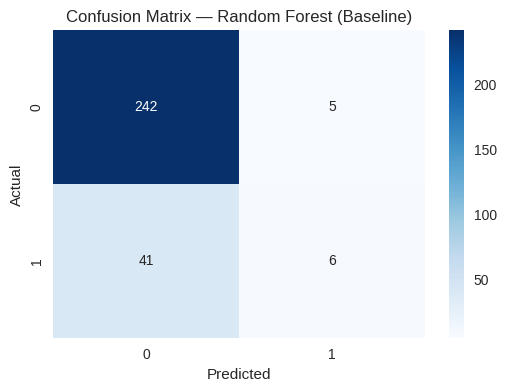

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# -------------------------
# Confusion Matrix (Random Forest)
# -------------------------
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Random Forest (Baseline)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The Receiver Operating Characteristic (ROC) curve and its Area Under the Curve (AUC) are plotted for the Random Forest model. This helps in understanding the model's ability to distinguish between classes at various threshold settings.

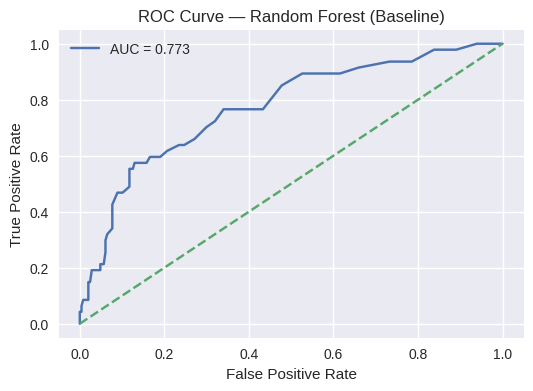

In [ ]:
# -------------------------
# ROC Curve
# -------------------------
if y_prob_rf is not None:
    fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
    auc_value = roc_auc_score(y_test, y_prob_rf)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {auc_value:.3f}")
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve — Random Forest (Baseline)")
    plt.legend()
    plt.show()

A Precision-Recall curve is generated for the Random Forest model. This curve is particularly useful for evaluating models on imbalanced datasets, as it highlights the trade-off between precision and recall.

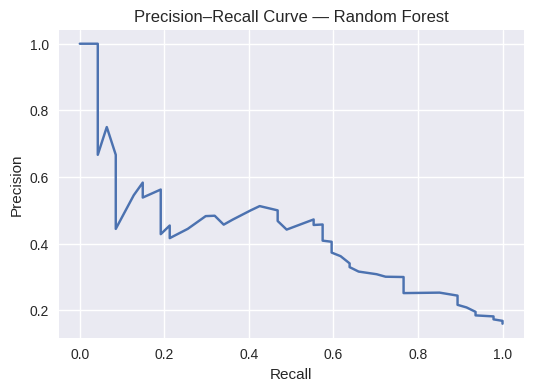

In [ ]:
# -------------------------
# Precision–Recall Curve
# -------------------------
if y_prob_rf is not None:
    precision, recall, _ = precision_recall_curve(y_test, y_prob_rf)

    plt.figure(figsize=(6,4))
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision–Recall Curve — Random Forest")
    plt.show()

# SECTION 12 — Hyperparameter Tuning (Random Forest)

This section initiates the hyperparameter tuning process for the Random Forest model using `RandomizedSearchCV`. We define a distribution of hyperparameters to search over, aiming to find the optimal combination for improved performance.

In [ ]:
print("Starting Random Forest Hyperparameter Tuning...")

param_dist = {
    "clf__n_estimators": [100, 200, 300, 400],
    "clf__max_depth": [None, 5, 10, 15, 20],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf": [1, 2, 4],
    "clf__max_features": ["sqrt", "log2"]
}

Starting Random Forest Hyperparameter Tuning...


The `RandomizedSearchCV` object is configured with the Random Forest pipeline, hyperparameter distributions, cross-validation settings, and scoring metric (F1-score, suitable for imbalanced datasets). `n_iter` defines the number of parameter settings that are sampled.

In [ ]:
rf_random_search = RandomizedSearchCV(
    pipe_rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="f1",
    random_state=RANDOM_SEED,
    n_jobs=-1,
    verbose=1
)

The `RandomizedSearchCV` is fit to the training data to find the best hyperparameters. After the search, the best parameters found and the corresponding best cross-validation F1-score are printed.

In [ ]:
rf_random_search.fit(X_train, y_train)

print("\n🎯 Best Parameters Found:")
print(rf_random_search.best_params_)

print("\n📌 Best Cross-Validation F1 Score:")
print(rf_random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

🎯 Best Parameters Found:
{'clf__n_estimators': 100, 'clf__min_samples_split': 10, 'clf__min_samples_leaf': 1, 'clf__max_features': 'sqrt', 'clf__max_depth': 15}

📌 Best Cross-Validation F1 Score:
0.3313492063492064


# SECTION 12B — Evaluate Tuned Random Forest

The best Random Forest model obtained from hyperparameter tuning (`rf_random_search.best_estimator_`) is used to make predictions on the test set. Probability predictions are also generated.

In [ ]:
best_rf = rf_random_search.best_estimator_

y_pred_best_rf = best_rf.predict(X_test)

try:
    y_prob_best_rf = best_rf.predict_proba(X_test)[:, 1]
except:
    y_prob_best_rf = None

The performance of the tuned Random Forest model is evaluated using various metrics, including accuracy, precision, recall, F1-score, and ROC-AUC. A classification report provides a detailed summary of its performance.

In [ ]:
print("\n==============================")
print("Tuned Random Forest Evaluation")
print("==============================")
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Precision:", precision_score(y_test, y_pred_best_rf))
print("Recall:", recall_score(y_test, y_pred_best_rf))
print("F1 Score:", f1_score(y_test, y_pred_best_rf))

if y_prob_best_rf is not None:
    print("ROC-AUC:", roc_auc_score(y_test, y_prob_best_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_rf))


Tuned Random Forest Evaluation
Accuracy: 0.8401360544217688
Precision: 0.5
Recall: 0.1276595744680851
F1 Score: 0.2033898305084746
ROC-AUC: 0.8032560944095098

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.50      0.13      0.20        47

    accuracy                           0.84       294
   macro avg       0.68      0.55      0.56       294
weighted avg       0.80      0.84      0.80       294



# SECTION 13A — Feature Importance (Random Forest)


This section extracts feature importances from the best-performing Random Forest model by retrieving feature_importances_ attributes after assembling all feature names (numerical and one-hot encoded categorical).

In [ ]:
# Extract feature names from the preprocessing pipeline
ohe = best_rf.named_steps["preprocessor"].named_transformers_["cat"].named_steps["onehot"]
ohe_features = list(ohe.get_feature_names_out(cat_features))

# Combined feature names
all_features = num_features + ohe_features

# Extract importances
importances = best_rf.named_steps["clf"].feature_importances_

In [ ]:
# Create DataFrame
fi_df = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

Visualize the top 20 most impactful features using a bar plot to highlight their relative contribution to predicting employee attrition.

In [ ]:
# Show top 20
fi_top20 = fi_df.head(20)
fi_top20

,Feature,Importance
0,Age,0.066055
9,MonthlyIncome,0.064684
16,TotalWorkingYears,0.058307
1,DailyRate,0.044332
19,YearsAtCompany,0.042890
5,HourlyRate,0.041062
2,DistanceFromHome,0.040993
50,OverTime_Yes,0.037926
10,MonthlyRate,0.036254
49,OverTime_No,0.035547


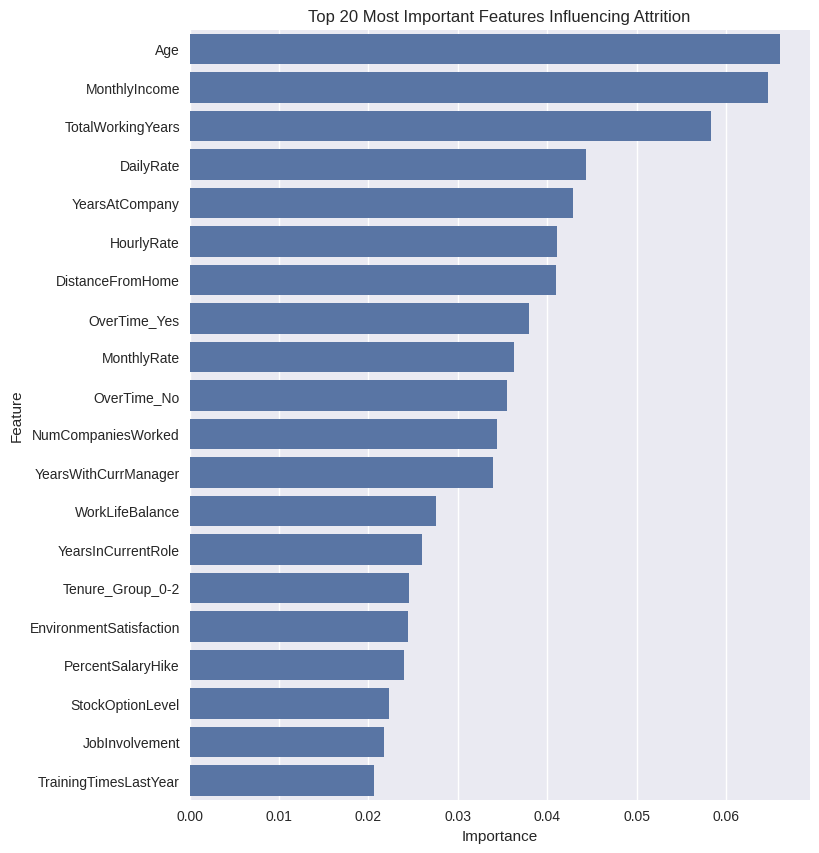

In [ ]:
# Display Barplot
plt.figure(figsize=(8, 10))
sns.barplot(x="Importance", y="Feature", data=fi_top20)
plt.title("Top 20 Most Important Features Influencing Attrition")
plt.show()

# SECTION 13B — SHAP Interpretability

This section employs SHAP (SHapley Additive exPlanations) for global model interpretability. It initializes a shap.TreeExplainer with the tuned Random Forest classifier.

In [ ]:
# Prepare a sample for SHAP (to speed up computation)
X_train_trans = best_rf.named_steps["preprocessor"].transform(X_train)

# Create SHAP explainer
explainer = shap.TreeExplainer(best_rf.named_steps["clf"])

 SHAP values are computed on a sampled dataset (200 random instances) to manage computational intensity.

In [ ]:
# Sample for speed
sample_idx = np.random.choice(X_train_trans.shape[0], size=200, replace=False)

shap_values = explainer.shap_values(X_train_trans[sample_idx])

A shap.summary_plot (bar type) is generated to visualize these values, ranking features by their average absolute SHAP value to show their overall impact on predictions.

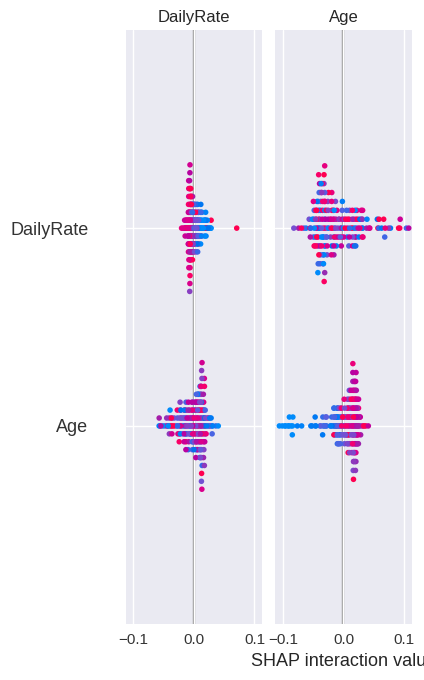

In [ ]:
# Summary plot (global view)
shap.summary_plot(
    shap_values,
    X_train_trans[sample_idx],
    feature_names=all_features,
    plot_type="bar"
)

# SECTION 14 — Error Analysis (FP & FN)

This section focuses on understanding model misclassifications by examining False Positives (FP) and False Negatives (FN). The process involves obtaining final predictions and probabilities from the best Random Forest model on the test set.

In [ ]:
# Predictions
final_preds = best_rf.predict(X_test)
final_probs = best_rf.predict_proba(X_test)[:, 1]

 A results_df is constructed to consolidate actual values, predicted outcomes, and prediction probabilities.

In [ ]:
# Create a result dataframe
results_df = X_test.copy()
results_df["Actual"] = y_test.values
results_df["Predicted"] = final_preds
results_df["Probability"] = final_probs

False Negatives are identified as instances where the model predicts 'No' but the employee actually 'Leaves' (actual 1, predicted 0), while False Positives are identified as instances where the model predicts 'Leaves' but the employee actually 'Stays' (actual 0, predicted 1).

In [ ]:
# False Negatives (Actual = 1, Predicted = 0)
FN = results_df[(results_df["Actual"] == 1) & (results_df["Predicted"] == 0)]
print(f"\n❌ False Negatives: {FN.shape[0]}")
display(FN.head())


❌ False Negatives: 41


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Tenure_Group,Income_Bucket,Actual,Predicted,Probability
69,36,Travel_Rarely,318,Research & Development,9,3,Medical,4,Male,79,...,2,1,0,0,0,0-2,Mid,1,0,0.341338
645,29,Travel_Rarely,341,Sales,1,3,Medical,2,Female,48,...,3,3,2,0,2,3-5,Low,1,0,0.335655
985,31,Travel_Rarely,330,Research & Development,22,4,Medical,4,Male,98,...,2,10,2,6,7,6-10,High,1,0,0.121002
136,51,Travel_Frequently,1150,Research & Development,8,4,Life Sciences,1,Male,53,...,3,4,2,0,3,11-20,Very_High,1,0,0.139927
45,41,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,2,Female,49,...,3,22,15,15,8,20+,Very_High,1,0,0.106251


In [ ]:
# False Positives (Actual = 0, Predicted = 1)
FP = results_df[(results_df["Actual"] == 0) & (results_df["Predicted"] == 1)]
print(f"\n⚠️ False Positives: {FP.shape[0]}")
display(FP.head())


⚠️ False Positives: 6


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Tenure_Group,Income_Bucket,Actual,Predicted,Probability
1311,18,Non-Travel,1431,Research & Development,14,3,Medical,2,Female,33,...,1,0,0,0,0,0-2,Low,0,1,0.517191
1402,31,Travel_Rarely,1276,Research & Development,2,1,Medical,4,Female,59,...,3,1,0,0,0,0-2,Low,0,1,0.550390
764,28,Travel_Rarely,1144,Sales,10,1,Medical,4,Male,74,...,3,1,0,0,0,0-2,Low,0,1,0.532256
17,22,Non-Travel,1123,Research & Development,16,2,Medical,4,Male,96,...,2,1,0,0,0,0-2,Mid,0,1,0.514421
301,18,Travel_Rarely,812,Sales,10,3,Medical,4,Female,69,...,3,0,0,0,0,0-2,Low,0,1,0.688015


# SECTION 15 - Save the Final Model

The best performing Random Forest model is serialized using `pickle` and then base64 encoded. This prepared model will be embedded directly into the Streamlit application for deployment.

In [ ]:
import pickle, base64

encoded_model = base64.b64encode(pickle.dumps(best_rf)).decode()
print("Model encoded successfully!")


Model encoded successfully!


In [ ]:
open('encoded_model.txt','w').write(encoded_model)

1782692

# SECTION 16 - Streamlit UI

This cell creates the `app.py` file, which contains the Streamlit application code. The application takes user inputs for employee features, uses the trained model to predict attrition risk, and displays the prediction along with the probability.

In [ ]:
''' %%writefile app.py
import streamlit as st
import pandas as pd
import pickle, base64

model = pickle.loads(base64.b64decode(st.secrets["model"]))

st.title("Employee Attrition Prediction")

age = st.number_input("Age", 18, 70)
income = st.number_input("Monthly Income", 1000, 200000)
overtime = st.selectbox("OverTime", ["Yes", "No"])
jobsat = st.slider("Job Satisfaction", 1, 4)

df = pd.DataFrame({
    "Age": [age],
    "MonthlyIncome": [income],
    "OverTime": [overtime],
    "JobSatisfaction": [jobsat]
})

if st.button("Predict"):
    pred = model.predict(df)[0]
    prob = model.predict_proba(df)[0][1]

    if pred == 1:
        st.error(f"⚠️ High Attrition Risk ({prob:.2f})")
    else:
        st.success(f"✅ Low Attrition Risk ({prob:.2f})") '''

' %%writefile app.py\nimport streamlit as st\nimport pandas as pd\nimport pickle, base64\n\nmodel = pickle.loads(base64.b64decode(st.secrets["model"]))\n\nst.title("Employee Attrition Prediction")\n\nage = st.number_input("Age", 18, 70)\nincome = st.number_input("Monthly Income", 1000, 200000)\novertime = st.selectbox("OverTime", ["Yes", "No"])\njobsat = st.slider("Job Satisfaction", 1, 4)\n\ndf = pd.DataFrame({\n    "Age": [age],\n    "MonthlyIncome": [income],\n    "OverTime": [overtime],\n    "JobSatisfaction": [jobsat]\n})\n\nif st.button("Predict"):\n    pred = model.predict(df)[0]\n    prob = model.predict_proba(df)[0][1]\n\n    if pred == 1:\n        st.error(f"⚠️ High Attrition Risk ({prob:.2f})")\n    else:\n        st.success(f"✅ Low Attrition Risk ({prob:.2f})") '

In [ ]:
# app.py
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle
import base64
import os
import matplotlib.pyplot as plt

st.set_page_config(page_title="Attrition Predictor", layout="wide")
st.title("Employee Attrition Prediction")

# Load model from file
def load_model():
    if os.path.exists("encoded_model.txt"):
        try:
            with open("encoded_model.txt", "r") as f:
                encoded = f.read().strip()
            model = pickle.loads(base64.b64decode(encoded))
            st.success("✅ Model loaded from encoded_model.txt")
            return model
        except Exception as e:
            st.error(f"Error loading model from file: {e}")
            return None
    else:
        st.error("❌ encoded_model.txt not found")
        return None

model = load_model()

if model is None:
    st.info("Please ensure encoded_model.txt is in the same directory")
    st.stop()

# Input form with ALL required features
st.sidebar.header("Employee Information")

# Personal Info
st.sidebar.subheader("Personal Details")
age = st.sidebar.number_input("Age", 18, 65, 30)
gender = st.sidebar.selectbox("Gender", ["Male", "Female"])
marital_status = st.sidebar.selectbox("Marital Status", ["Single", "Married", "Divorced"])
distance_from_home = st.sidebar.number_input("Distance From Home (km)", 0, 50, 10)

# Job Details
st.sidebar.subheader("Job Information")
job_role = st.sidebar.selectbox("Job Role",
    ["Sales Executive", "Research Scientist", "Laboratory Technician",
     "Manufacturing Director", "Healthcare Representative", "Manager",
     "Sales Representative", "Research Director", "Human Resources"])
department = st.sidebar.selectbox("Department",
    ["Sales", "Research & Development", "Human Resources"])
job_level = st.sidebar.slider("Job Level", 1, 5, 2)
business_travel = st.sidebar.selectbox("Business Travel",
    ["Non-Travel", "Travel_Rarely", "Travel_Frequently"])

# Experience
st.sidebar.subheader("Experience")
total_working_years = st.sidebar.number_input("Total Working Years", 0, 40, 10)
years_at_company = st.sidebar.number_input("Years at Company", 0, 40, 5)
years_in_current_role = st.sidebar.number_input("Years in Current Role", 0, 20, 3)
years_since_last_promotion = st.sidebar.number_input("Years Since Last Promotion", 0, 15, 1)
years_with_curr_manager = st.sidebar.number_input("Years With Current Manager", 0, 20, 2)
num_companies_worked = st.sidebar.number_input("Number of Companies Worked", 0, 10, 2)

# Education & Training
st.sidebar.subheader("Education & Training")
education = st.sidebar.slider("Education Level (1=Below College, 5=Doctor)", 1, 5, 3)
education_field = st.sidebar.selectbox("Education Field",
    ["Life Sciences", "Medical", "Marketing", "Technical Degree",
     "Human Resources", "Other"])
training_times_last_year = st.sidebar.number_input("Training Times Last Year", 0, 6, 2)

# Compensation
st.sidebar.subheader("Compensation")
monthly_income = st.sidebar.number_input("Monthly Income", 1000, 20000, 5000, 500)
monthly_rate = st.sidebar.number_input("Monthly Rate", 2000, 27000, 14000)
daily_rate = st.sidebar.number_input("Daily Rate", 100, 1500, 800)
hourly_rate = st.sidebar.number_input("Hourly Rate", 30, 100, 65)
percent_salary_hike = st.sidebar.slider("Percent Salary Hike", 11, 25, 15)
stock_option_level = st.sidebar.slider("Stock Option Level", 0, 3, 1)

# Satisfaction & Performance
st.sidebar.subheader("Satisfaction & Performance")
job_satisfaction = st.sidebar.slider("Job Satisfaction", 1, 4, 3)
environment_satisfaction = st.sidebar.slider("Environment Satisfaction", 1, 4, 3)
relationship_satisfaction = st.sidebar.slider("Relationship Satisfaction", 1, 4, 3)
work_life_balance = st.sidebar.slider("Work-Life Balance", 1, 4, 3)
job_involvement = st.sidebar.slider("Job Involvement", 1, 4, 3)
performance_rating = st.sidebar.slider("Performance Rating", 1, 4, 3)

# Work Conditions
st.sidebar.subheader("Work Conditions")
overtime = st.sidebar.selectbox("Overtime", ["No", "Yes"])

# Derived features
income_bucket = "High" if monthly_income > 10000 else "Medium" if monthly_income > 5000 else "Low"
tenure_group = "Long" if years_at_company > 10 else "Medium" if years_at_company > 5 else "Short"

# Create input dataframe with ALL features
input_data = {
    "Age": age,
    "BusinessTravel": business_travel,
    "DailyRate": daily_rate,
    "Department": department,
    "DistanceFromHome": distance_from_home,
    "Education": education,
    "EducationField": education_field,
    "EnvironmentSatisfaction": environment_satisfaction,
    "Gender": gender,
    "HourlyRate": hourly_rate,
    "JobInvolvement": job_involvement,
    "JobLevel": job_level,
    "JobRole": job_role,
    "JobSatisfaction": job_satisfaction,
    "MaritalStatus": marital_status,
    "MonthlyIncome": monthly_income,
    "MonthlyRate": monthly_rate,
    "NumCompaniesWorked": num_companies_worked,
    "OverTime": overtime,
    "PercentSalaryHike": percent_salary_hike,
    "PerformanceRating": performance_rating,
    "RelationshipSatisfaction": relationship_satisfaction,
    "StockOptionLevel": stock_option_level,
    "TotalWorkingYears": total_working_years,
    "TrainingTimesLastYear": training_times_last_year,
    "WorkLifeBalance": work_life_balance,
    "YearsAtCompany": years_at_company,
    "YearsInCurrentRole": years_in_current_role,
    "YearsSinceLastPromotion": years_since_last_promotion,
    "YearsWithCurrManager": years_with_curr_manager,
    "Income_Bucket": income_bucket,
    "Tenure_Group": tenure_group
}

input_df = pd.DataFrame([input_data])

# Show input
with st.expander("View Input Data"):
    st.dataframe(input_df.T, use_container_width=True)

# Predict
if st.button("🔮 Predict Attrition", type="primary", use_container_width=True):
    try:
        # Get prediction
        prediction = model.predict(input_df)[0]
        proba = model.predict_proba(input_df)[0]
        attrition_prob = proba[1]

        # Display results
        st.markdown("---")
        st.subheader("Prediction Results")

        # Metrics
        col1, col2, col3 = st.columns(3)
        with col1:
            st.metric("Attrition Risk", f"{attrition_prob:.1%}")
        with col2:
            st.metric("Retention Probability", f"{1-attrition_prob:.1%}")
        with col3:
            risk_level = "🔴 High" if attrition_prob > 0.6 else "🟡 Medium" if attrition_prob > 0.3 else "🟢 Low"
            st.metric("Risk Level", risk_level)

        # Progress bar
        st.progress(attrition_prob)

        # Visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

        # Bar chart
        ax1.bar(["Will Leave", "Will Stay"], [attrition_prob, 1-attrition_prob],
               color=['#ff6b6b', '#51cf66'])
        ax1.set_ylabel("Probability")
        ax1.set_title("Attrition Probability")
        ax1.set_ylim(0, 1)
        for i, v in enumerate([attrition_prob, 1-attrition_prob]):
            ax1.text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')

        # Donut chart
        wedges, texts, autotexts = ax2.pie(
            [attrition_prob, 1-attrition_prob],
            labels=["Leave", "Stay"],
            autopct='%1.1f%%',
            colors=['#ff6b6b', '#51cf66'],
            wedgeprops=dict(width=0.5),
            startangle=90
        )
        ax2.set_title("Distribution")

        plt.tight_layout()
        st.pyplot(fig)

        # Final message
        if prediction == 1:
            st.error("⚠️ **High attrition risk detected - Consider retention strategies**")
        else:
            st.success("✅ **Low attrition risk - Employee likely to stay**")

    except Exception as e:
        st.error(f"Prediction failed: {e}")
        st.code(str(e))

# Instructions
with st.expander("ℹ️ Instructions"):
    st.markdown("""
    **Usage:**
    - Fill in all employee information in the sidebar
    - Click "Predict Attrition" to see results
    - The model uses all 31 features for accurate prediction
    """)

Overwriting app.py


**This** final step launches the Streamlit application locally and creates a public URL using `pyngrok`. This allows you to access and interact with your deployed attrition prediction application through a web browser.

In [ ]:
from pyngrok import ngrok

# Start Streamlit
get_ipython().system_raw('streamlit run app.py --server.port 8501 &')

# Open tunnel to the Streamlit port
public_url = ngrok.connect(8501)
print("Streamlit app available at:", public_url)

Streamlit app available at: NgrokTunnel: "https://unsurrendering-wartier-kyoko.ngrok-free.dev" -> "http://localhost:8501"
